In [11]:
# --- jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
#       jupytext_version: 1.16.1
#   kernelspec:
#     display_name: Python 3 (ipykernel)
#     language: python
#     name: python3
# ---

In [12]:
from jupyter_client import find_connection_file

connection_file = find_connection_file()
# print(connection_file)

In [13]:
# Plotting related
import os
import sys

sys.tracebacklimit = 0

import seaborn as sns

# sns.set_palette(["#3498db", "orange"])

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio


# Scikit-learn related imports
import numpy as np
import pandas as pd

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_colwidth", None)
pd.options.mode.copy_on_write = True

from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint, ttest_ind
from sklearn.linear_model import LogisticRegression

# Jupyter-related
from IPython.display import display, HTML, Markdown


# Constants for this project
import constants
from constants import *

import auxFunctions as af

import importlib


In [14]:
# Change the current working directory
os.chdir("/home/yonatan/Documents/projects/vaccines/code")

# maybe make plotly work
pio.renderers.default = "notebook"

In [15]:
def get_data_dir():
    # Define the starting directory
    current_dir = os.getcwd()

    # Traverse up the directory tree until we find a directory named "data"
    while current_dir != "/":
        if "data" in os.listdir(current_dir):
            data_dir = os.path.join(current_dir, "data")
            return data_dir
        current_dir = os.path.dirname(current_dir)
    else:
        print("Directory 'data' not found in the parent directories.")
        raise ()

In [16]:
# Read in Data and drop missing values
data_dir = get_data_dir()
df = pd.read_csv(os.path.join(data_dir, "../data/all_vaccines.csv"))
df.dropna(inplace=True, subset=[immage_col, dataset_col, day_col, response_col])

datasets = df
dataset_names = df.Dataset.unique()

In [17]:
importlib.reload(af)

<module 'auxFunctions' from '/home/yonatan/Documents/projects/vaccines/code/auxFunctions.py'>

In [18]:
# These parameters are overridden by papermill
strain_index = 2
dataset_name = "GSE48023.SDY1276"
day = "nAb.D14"
day0 = "HAI.D0"
dayMFC = "HAI.MFC"

bAdjustMFC = False
bInfluenza = False
bDiscardSeroprotected = True
bOlderOnly = False

In [ ]:
# Parameters
bAdjustMFC = True
dataset_name = "GSE52245.SDY1260"
strain_index = 5
day = "D30"


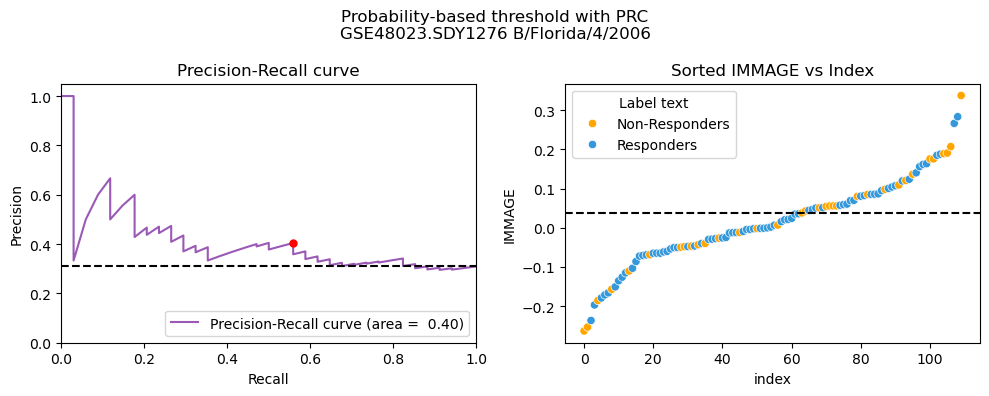

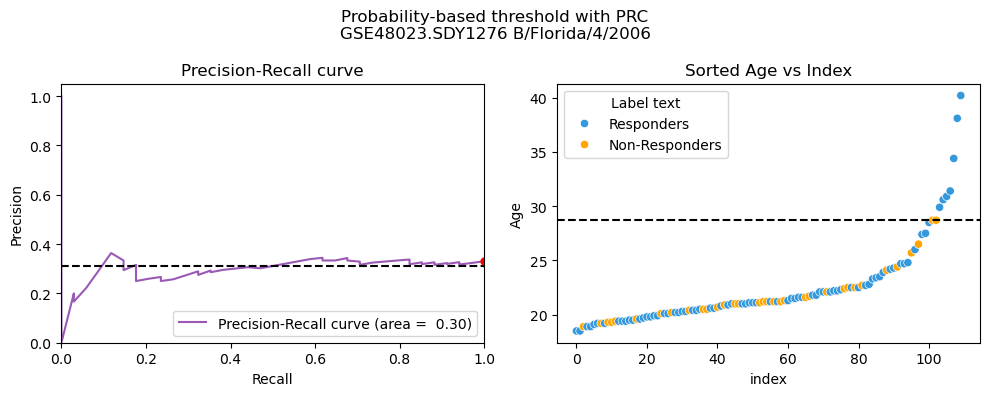

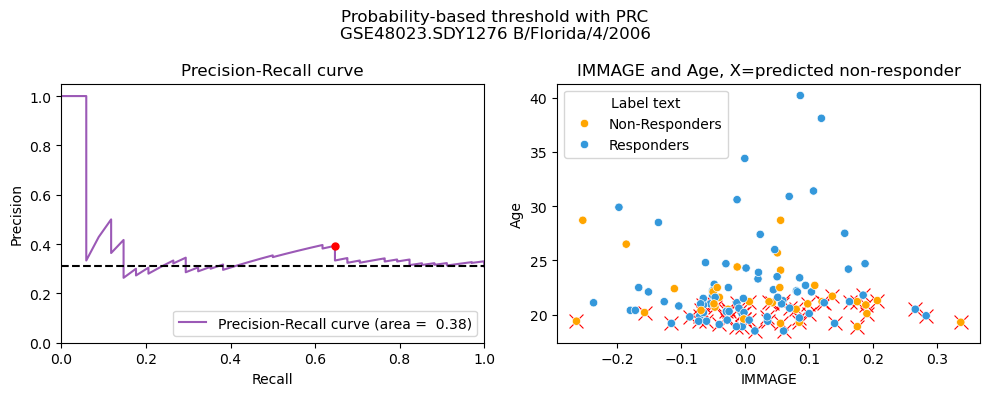

F score                   NR rate over threshold                    \
   IMMAGE  Age Multivariate                 IMMAGE  Age Multivariate   
0    0.44 0.42         0.45                   0.39 0.22         0.39   

  NR rate under threshold                   Composite                    \
                   IMMAGE  Age Multivariate    IMMAGE  Age Multivariate   
0                    0.25 0.32         0.22      0.42 0.32         0.42   

  max difference  
                  
0           0.10

In [21]:
importlib.reload(af)
importlib.reload(constants)
# Narrow to a specific datset
# Filter data
name_mask = datasets[dataset_col] == dataset_name
dataset = datasets.loc[name_mask].reset_index(drop=True)
strains = af.get_strains(dataset, day)

P = {
    "bAdjustMFC": bAdjustMFC,
    "dataset_name": dataset_name,
    "strain_index": strain_index,
    "day":  day,
    "day0":  day0,
    "strain": strains[strain_index],
    "strains": strains,
    "bPlotOnly": False,
    "bPlotThreshold": True,
}


text = f"Analysis for dataset: {dataset_name}, strain: {strains[strain_index]}, day: {day}, using adjFC: {bAdjustMFC}"
text = f"<div style='font-size:20px;font-weight:bold;'>{text}</div>"

display(HTML(text))
res = af.analyze_dataset(dataset, P)

display(res)